<a href="https://colab.research.google.com/github/JazminRivas/Calculo-numerico-1er-cuatri-2024/blob/main/parcial_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple

$$
\text{Ejercicio 1: Newton + Jacobi}
$$

Dada una función $ F: \mathbb{R}^n \to \mathbb{R}^n $, se quiere hallar un cero de la misma, es decir, un $v \in \mathbb{R}^n $ tal que $ F(v) = 0 $. Implementar el método de Newton-Raphson dado por

$$
v_{k+1} = v_k - (J(v_k))^{-1} F(v_k),
$$

donde $ J $ es la matriz Jacobiana de $ F $ siendo $ J_{i,j} = \frac{\partial f_i}{\partial x_j} $ para $ 1 \leq i, j \leq n $.

Nota que si en la igualdad de arriba multiplicamos por \( J(v_k) \) en ambas partes de la igualdad obtenemos

$$
J(v_k) v_{k+1} = J(v_k) v_k - F(v_k).
$$

De aquí se sigue que

$$
J(v_k) (v_{k+1} - v_k) = -F(v_k).
$$

Se concluye que no es necesario calcular \( (J(v_k))^{-1} \) pues podemos resolver el sistema de arriba con alguno de los métodos estudiados en clase (Jacobi, Gauss-Seidel). Con lo que, si llamamos \( v_{\text{Sol}} \) a la solución aproximada obtenida luego de aplicar alguno de los citados métodos iterativos, podemos concluir que

$$
v_{k+1} = v_k + v_{\text{Sol}}.
$$

1) Escribir una función llamada $\texttt{NewtonDosDim}$ que reciba como input una $ F: \mathbb{R}^2 \to \mathbb{R}^2 $ dada por $F(x, y) = (f_1(x, y), f_2(x, y)) $, su matriz Jacobiana, un vector inicial $ v_0 $, una tolerancia $\texttt{tol}$ y la cantidad máxima de iteraciones $\texttt{maxIter}$. La función debe iterar hasta que se alcance el número máximo de iteraciones o el error relativo entre $ v_k $ y $ v_{k+1} $ sea menor que $\texttt{tol}$, es decir,
$$
    \frac{\| v_{k+1} - v_k \|_2}{\| v_{k+1} \|_2} < \texttt{tol}.
$$

No se permite calcular la inversa de la matriz Jacobiana. Resolver el sistema con el método de Jacobi. El output debe ser el último \( v_k \) y el número de iteraciones realizadas.

2) Testear el funcionamiento con $ F(x, y) = (y - x^2 + 2, x - y^2 + 2) $, una $\texttt{tol} =  10^{-10} $ y $\texttt{maxIter} = 50.$ Utilizar como $ v_0 $ los siguientes vectores: $[3, 2],[-10, -10], [0.4, -1]$ y $[-1, 2]$. Imprimir las respuestas.


In [2]:
def jacobi(A: np.ndarray, b: np.ndarray, x0: Optional[np.ndarray] = None, max_iter: int = 100) -> np.ndarray:
    D = np.diag(np.diag(A))
    L = np.tril(A,-1)
    U = np.triu(A,1)
    D_inv =np.linalg.inv(D)
    M = -D_inv@(L+U)
    c = D_inv@b

    if x0 is None:
        x0 = c

    # Guardo lugar para la sucesion
    # La fila i va a ser la aproximación en la iteración i
    # Las columnas van a ser las coordenadas de cada aproximación
    x = np.empty((max_iter, x0.size))

    for i in range(max_iter-1):
        x[i+1,:] = M @ x[i,:] + c

    return x[-1,:]

def NewtonDosDim(Funcion,JF,x0,tol, max_iter = 50):
  x = np.zeros((max_iter,len(x0))) #guardo lugar para las iteraciones
  x[0,:] = x0 #pongo al vector inicial
  for i in range(max_iter-1):
          F = - Funcion(*x[i,:])
          J = JF(*x[i,:])
          Jac = jacobi(J,F) #me devuelve la última solución del método de jacobi
          x[i+1,:] = x[i,:] + Jac
          #calculamos el error relativo
          numerador = np.linalg.norm(x[i+1,:]-x[i,:],2)
          denominador = np.linalg.norm(x[i+1,:],2)
          error = numerador/denominador
          if error < tol:
              break  #que corte una vez que el error relativo es menor que la tolerancia
  return x[i+1,:],i+1 #devuelve la última iteracion, y el numero de la iteración que hizo que converja.

In [3]:
#Segunda parte, testeo con una función
def F(x,y):
  return np.array([y-x**2+2,x-y**2+2])
def Jacobiano(x,y): #voy definiendo cada diferencial... F1 vendría a ser la funcion de la primer coordenada y F2 la de la segunda
    dF1_dx = -2*x
    dF1_dy = 1
    dF2_dy = -2*y
    return np.array([[dF1_dx, dF1_dy], [dF1_dx, dF2_dy]])

tol = 1e-10
#voy a armarme una listita con los vectores iniciales
vectores = []
v1 = np.array([3,2])
vectores.append(v1)
v2 = np.array([-10,-10])
vectores.append(v2)
v3 = np.array([0.4,-1])
vectores.append(v3)
v4 = np.array([-1,2])
vectores.append(v4)
for vector in vectores:
  sol, iter = NewtonDosDim(F,Jacobiano,vector,tol)
  print("La solucion de Newton-Raphson usando Jacobi con v0 =",vector,"es", sol)

#lo chequeé con la calculadora y parecen estar bien


La solucion de Newton-Raphson usando Jacobi con v0 = [3 2] es [2. 2.]
La solucion de Newton-Raphson usando Jacobi con v0 = [-10 -10] es [-1. -1.]
La solucion de Newton-Raphson usando Jacobi con v0 = [ 0.4 -1. ] es [ 0.6180377 -1.6180294]
La solucion de Newton-Raphson usando Jacobi con v0 = [-1  2] es [-1.61803399  0.61803399]


$$
\text{Ejercicio 2: Interpolación + Diferencias Finitas}
$$

1) Programe una función que le permita aproximar la siguiente tabla de datos en el sentido de cuadrados mínimos:
    
$$
    \begin{array}{c|cccc}
    x & 0 & 0.4 & 0.7 & 1 \\
    \hline
    y & 5 & 7 & 3 & 2
    \end{array}
$$
    
con una función del tipo

$$
    f(x) = a \sin(x) + b \cos(x).
$$
    
Nota que debe linealizar el problema, o sea, si invierte la definición de la función de arriba se obtendría:

$$
    \frac{1}{f(x)} = a \sin(x) + b \cos(x),
$$

con lo que resultaría sencillo hallar los coeficientes $ a $ y $ b $.

2)  Considerando la función $ f(x) $ del ítem anterior, se nos plantea el siguiente problema de valores de contorno:

$$
    \begin{cases}
    u''(x) + u(x) = f(x), & x \in (0, 1) \\
    u(0) = 5 \\
    u(1) = 7
    \end{cases}
$$

Se quiere resolver en forma aproximada para lo cual se discretiza el intervalo $[0, 1]$ con nodos $ x_j = jh $ $(0 \leq j \leq N)$, donde $ h = \frac{1}{N} $. Se aproxima la segunda derivada espacial mediante la siguiente fórmula:

$$
    u''(x) \approx \frac{u(x - h) - 2 u(x) + u(x + h)}{h^2}.
$$

Por lo tanto, el problema dado se puede formular en forma discretizada de la siguiente manera:

$$
    \begin{cases}
    \frac{u_{j-1} - 2 u_j + u_{j+1}}{h^2} + u_j = f_j, & 1 \leq j \leq N - 1 \\
    u_0 = 5 \\
    u_N = 7
    \end{cases}
$$


In [4]:
#Parte 1

#si f(x) = 1/(asen(x)+bcos(x))---> f^-1(x) = asen(x) + bcos(x)

#datos de la tabla
x = np.array([0,0.4,0.7,1])
y = np.array([5,7,3,2])

#ahora invierto los valores de y para obtener los valores de f^-1(x)
y_inv = np.array([1/5,1/7,1/3,1/2])

#Después de hacer un par de cálculos en una hoja, la matriz tiene la pinta np.array([sen(0), cos([0]),[sen(0.4),cos(0.4)],[sen(0.7), cos(0.7)],[sen(1),cos(1)]])

Matriz_cuadrados_minimos = np.array([[np.sin(0), np.cos(0)],[np.sin(0.4),np.cos(0.4)],[np.sin(0.7), np.cos(0.7)],[np.sin(1),np.cos(1)]]) #esta sería mi matriz A, la cual tengo que trasponer
def cuadrados_minimos(A,y):  #toma un matriz A y un vector Y (serían los valores de y en la tabla). Devuelve los coeficientes que vienen de hacer cuadrados mínimos, en este caso devuelve [a,b]
  At = A.T
  AtA = At@A
  Aty = At@y
  #resuelvo el sistema A^tA = A^ty
  sol = np.linalg.solve(AtA,Aty)
  return sol

sol = cuadrados_minimos(Matriz_cuadrados_minimos,y_inv)

print("a =", sol[0], "b =", sol[1])

#Los coeficientes me dieron a = 0.4323996 y b= 0.10712433. Luego, f(x)= 1/(0.4323966sen(x)+0.10712433cos(x))

a = 0.4323999646587513 b = 0.10712432535673669


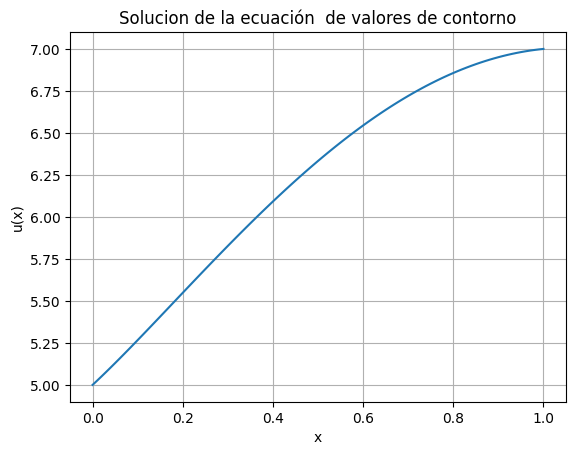

In [5]:
#segunda parte

#primero programo la función del item anterior
def f2(x):
  return (sol[0]*np.sin(x) + sol[1]*np.cos(x))**(-1)

h = 0.01
x0 = 0
xf = 1
alpha = 5 #valor inicial
beta = 7 #valor final
pasos = 100 #viene de hacer 1/0.01, esto sólo lo voy a usar cuando defina el linspace para plotear la funcion
#defino la matriz evolucion
def Mat_A(h,x0,xf):
  N = int((xf - x0)/h)
  diagonal = (-2/h**2+1) * np.eye(N-1)
  diagonal_superior = (1/h**2)*np.eye(N-1, k=1)
  diagonal_inferior = (1/h**2)*np.eye(N-1, k=-1)
  return diagonal + diagonal_inferior + diagonal_superior

#necesito definir el vector f(xj)
def fj(alpha,beta,x0,xf,h,f):
  n = int((xf-x0)/h)
  be = np.zeros(n-1)
  exis = np.linspace(x0+h,xf-h,n-1) #quiero que vaya de x1 a xn-1 y son n-1 puntos
  for i in range(n-1):
    be[i] = f(exis[i])
  be[-1] = f(exis[-1])- beta/h**2  #en la iteracion n-1 aparece (Uj-1 - Uj)/h² = fj-1 - 7/h²
  be[0] -= alpha/h**2 #con j=1, en la iteracion aparece (-Uj + Uj+1)/h² = f1 - 5/h²
  return be


def DifFinProbContorno(A,b,x0,xf,h,alpha,beta,f): #recibe una matriz de evolucion A, el vector b de contorno y todos los otros datos y devuelve el vector de solucion [u0,...,uN]
  A = Mat_A(h,x0,xf)
  b = fj(alpha,beta,x0,xf,h,f2)
  #necesito invertir la matriz y obtengo U = A^-1*b
  inv_A = np.linalg.inv(A)
  u = np.dot(inv_A,b)
  u = [alpha]+list(u)+[beta] #le agrego U0 y UN
  return u

A = Mat_A(h,x0,xf)
b = fj(alpha,beta,x0,xf,h,f2)
solucion_calor = DifFinProbContorno(A,b,x0,xf,h,alpha,beta,f2)
#puse print y parece dar Ok, ahora la grafico

#defino una grilla de puntos en el intervalo [0,1]
x2  = np.linspace(x0,xf,pasos+1)
plt.plot(x2,solucion_calor)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solucion de la ecuación  de valores de contorno')
plt.grid(True)
plt.show()